<a href="https://colab.research.google.com/github/koppisettisravya/FML-lab/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
     

In [3]:
X_tr=pd.read_csv('/content/archive (3).zip')
X_tr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [7]:
X_ts=pd.read_csv('/content/archive (3).zip')
X_ts

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
X_tr.isnull().sum(),X_ts.isnull().sum()

(battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64,
 battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64)

In [10]:
X_train=X_tr.iloc[:,:20]
X_test=X_ts.iloc[:,:20]
y_train=X_tr.iloc[:,20]
y_test=X_ts.iloc[:,20]


In [11]:
y_test,y_trainm=confusion_matrix(y_test,y_pred)

NameError: ignored

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

     

GaussianNB()

In [13]:
y_pred=model.predict(X_test)

In [14]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)
     

0.82

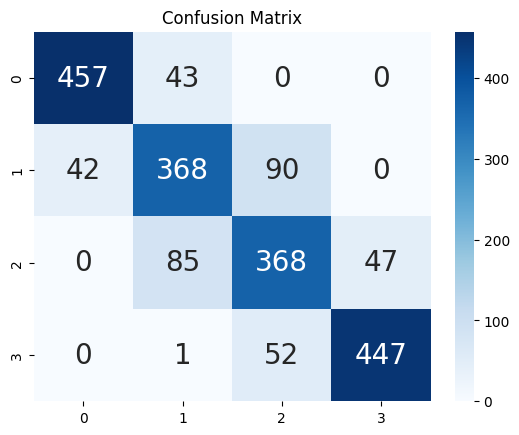

In [15]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
ax=plt.axes()
sns.heatmap(cm,annot=True,annot_kws={"size":20},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()